# KNN Regressor using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm K-Nearest Neighbors as a Regressor algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis 

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset):
    dataset.iloc[:,4:] = dataset.iloc[:,4:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Initialize Test Set (HOME | BLE)

In [5]:
test_dataset_ble  = load_file('../radiomap_home_BluetoothWiFi.csv')
test_dataset_ble  = replace_features_nan(test_dataset_ble)
display(test_dataset_ble)
display(test_dataset_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69,-68.0,-69.0,-72.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70,-66.0,-66.0,-70.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,-87.0,-76.0
2,526,-2.0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527,-2.0,0.5,-65,-66.0,-66.0,-70.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66,-66.0,-66.0,-71.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65,-68.0,-68.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-76.0,NaN,-87.0,-76.0,NaN
126,650,-2.0,-1.5,-66,-67.0,-64.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-88.0,-80.0,NaN
127,651,-2.0,-1.5,-65,-68.0,-66.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-96.0,-76.0,NaN
128,652,-2.0,-1.5,-65,-68.0,-66.0,NaN,-72.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-86.0,-76.0,NaN


(130, 18)

### Initialize Test Set (Home | Only BLE)

In [6]:
test_dataset_home_ble = load_file('../radiomap_home_Bluetooth.csv')
test_dataset_home_ble = replace_features_nan(test_dataset_home_ble)
display(test_dataset_home_ble)
display(test_dataset_home_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,NaN
1,391,-2.0,0.5,-84,-80,NaN
2,392,-2.0,0.5,-84,-85,NaN
3,393,-2.0,0.5,-84,-84,NaN
4,394,-2.0,0.5,-90,-81,NaN
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,NaN
126,517,-2.0,-1.5,-81,-90,NaN
127,518,-2.0,-1.5,-80,-88,NaN
128,519,-2.0,-1.5,-81,-87,NaN


(130, 6)

### Dataset Overall Info

In [7]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [8]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [9]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    display(missing_dataset)

In [10]:
compute_missing_values(dataset)

,Missing Values
Fingerprint ID,0
coordinate_X,0
coordinate_Y,0
zone,0
f0:5c:19:94:1a:40,120
f0:5c:19:94:1a:41,116
f0:5c:19:94:1a:42,115
34:fc:b9:18:e4:c1,561
34:fc:b9:18:e4:c0,605
34:fc:b9:18:e4:c2,572


### Overall Histogram of dataset atributes

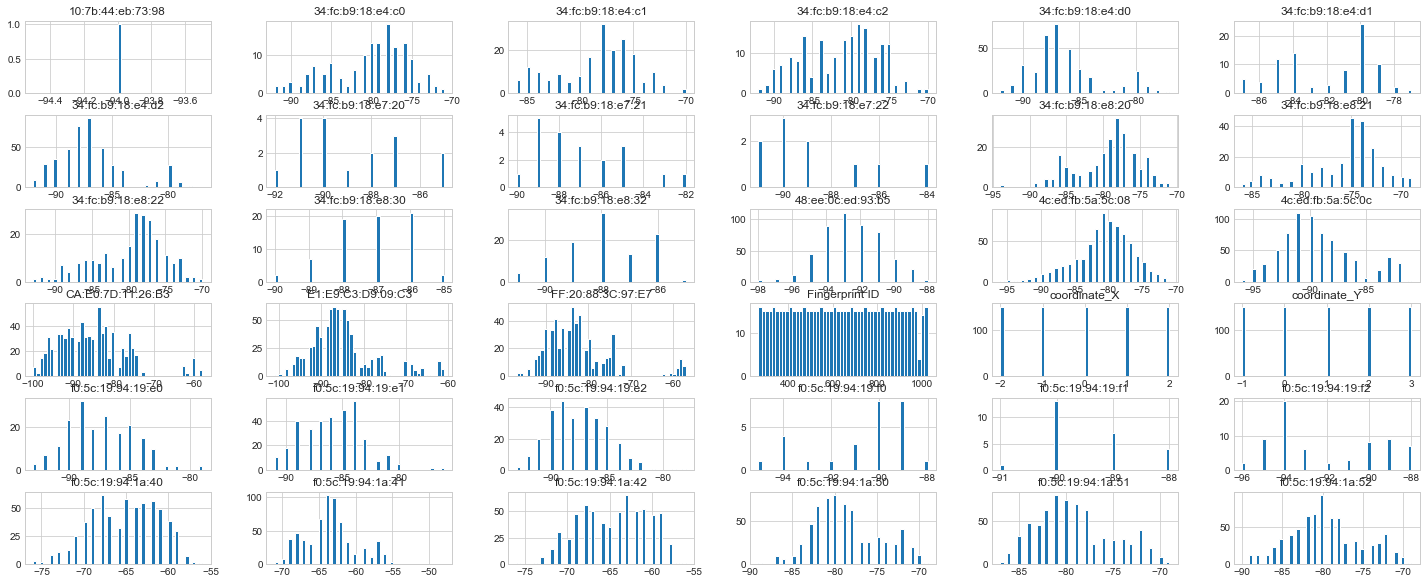

In [11]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Reference Points
Graphical display of the reference points scanned in the experiment

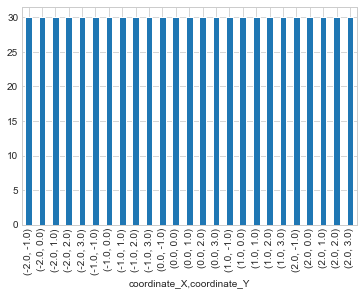

In [12]:
reference_points = dataset.groupby(['coordinate_X','coordinate_Y'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

<BarContainer object of 30 artists>

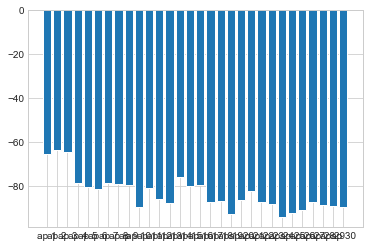

In [13]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.islower() == False:
        first_beacon_index = list(dataset.iloc[:,4:]).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

<BarContainer object of 3 artists>

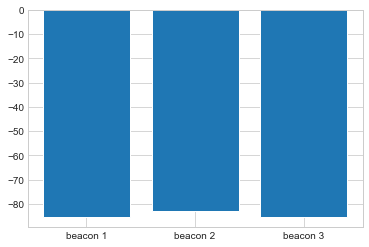

In [14]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

## Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

### Wifi Signal Strength

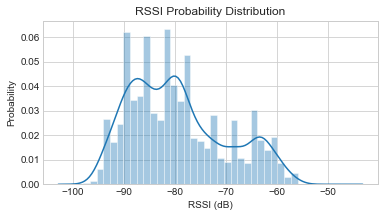

In [15]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset.iloc[:,4:].iloc[:,:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Bluetooth Signal Strength

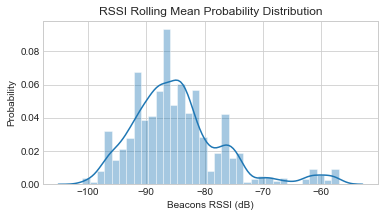

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,4:].iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [17]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [18]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers

In [19]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [20]:
for x in dataset.iloc[:,4:]:
    display(x)
    compute_data_cleaning(dataset,x)
display(dataset)

'f0:5c:19:94:1a:40'

'f0:5c:19:94:1a:41'

'f0:5c:19:94:1a:42'

'34:fc:b9:18:e4:c1'

'34:fc:b9:18:e4:c0'

'34:fc:b9:18:e4:c2'

'f0:5c:19:94:1a:50'

'f0:5c:19:94:1a:51'

'f0:5c:19:94:1a:52'

'4c:ed:fb:5a:5c:0c'

'4c:ed:fb:5a:5c:08'

'f0:5c:19:94:19:e1'

'f0:5c:19:94:19:e2'

'34:fc:b9:18:e8:21'

'34:fc:b9:18:e8:22'

'34:fc:b9:18:e8:20'

'f0:5c:19:94:19:e0'

'34:fc:b9:18:e4:d2'

'48:ee:0c:ed:93:b5'

'34:fc:b9:18:e4:d0'

'34:fc:b9:18:e4:d1'

'34:fc:b9:18:e8:30'

'34:fc:b9:18:e8:32'

'10:7b:44:eb:73:98'

'f0:5c:19:94:19:f2'

'f0:5c:19:94:19:f0'

'34:fc:b9:18:e7:21'

'34:fc:b9:18:e7:22'

'34:fc:b9:18:e7:20'

'f0:5c:19:94:19:f1'

'E1:E9:C3:D9:09:C3'

'FF:20:88:3C:97:E7'

'CA:E0:7D:11:26:B3'

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93


In [21]:
first_beacon_index_test_dataset = -1
for ap in test_dataset_ble.iloc[:,3:]:
    if ap.islower() == False:
        first_beacon_index_test_dataset = list(test_dataset_ble.iloc[:,3:]).index(ap)
        break
display("BEACON INDEX")
display(first_beacon_index_test_dataset)

'BEACON INDEX'

12

In [22]:
test_Y = test_dataset_ble[['coordinate_X','coordinate_Y']]
display(test_Y)
test_dataset_ble = test_Y.join(test_dataset_ble.iloc[:,3:].iloc[:,first_beacon_index_test_dataset:])
display(test_dataset_ble)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


,coordinate_X,coordinate_Y,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-2.0,0.5,-87.0,-90.0,-83.0
1,-2.0,0.5,-88.0,-87.0,-76.0
2,-2.0,0.5,NaN,NaN,NaN
3,-2.0,0.5,-86.0,-87.0,-81.0
4,-2.0,0.5,-92.0,-91.0,NaN
...,...,...,...,...,...
125,-2.0,-1.5,-87.0,-76.0,NaN
126,-2.0,-1.5,-88.0,-80.0,NaN
127,-2.0,-1.5,-96.0,-76.0,NaN
128,-2.0,-1.5,-86.0,-76.0,NaN


In [23]:
for x in test_dataset_ble:
    display(x)
    compute_data_cleaning(test_dataset_ble,x)
display(test_dataset_ble)

'coordinate_X'

'coordinate_Y'

'FF:20:88:3C:97:E7'

'CA:E0:7D:11:26:B3'

'E1:E9:C3:D9:09:C3'

,coordinate_X,coordinate_Y,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-2.0,0.5,-87.0,-90.00,-83.00
1,-2.0,0.5,-88.0,-87.00,-76.00
2,-2.0,0.5,-101.0,-94.94,-86.86
3,-2.0,0.5,-86.0,-87.00,-81.00
4,-2.0,0.5,-92.0,-91.00,-86.86
...,...,...,...,...,...
125,-2.0,-1.5,-87.0,-76.00,-86.86
126,-2.0,-1.5,-88.0,-80.00,-86.86
127,-2.0,-1.5,-96.0,-76.00,-86.86
128,-2.0,-1.5,-86.0,-76.00,-86.86


In [24]:
for x in test_dataset_home_ble.iloc[:,3:]:
    display(x)
    compute_data_cleaning(test_dataset_home_ble,x)
display(test_dataset_home_ble)

'CA:E0:7D:11:26:B3'

'FF:20:88:3C:97:E7'

'E1:E9:C3:D9:09:C3'

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,-88.88
1,391,-2.0,0.5,-84,-80,-88.88
2,392,-2.0,0.5,-84,-85,-88.88
3,393,-2.0,0.5,-84,-84,-88.88
4,394,-2.0,0.5,-90,-81,-88.88
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,-88.88
126,517,-2.0,-1.5,-81,-90,-88.88
127,518,-2.0,-1.5,-80,-88,-88.88
128,519,-2.0,-1.5,-81,-87,-88.88


### Initialize Training Data
Training Data intialization for predictions purposes

In [25]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:e0,34:fc:b9:18:e4:d2,48:ee:0c:ed:93:b5,34:fc:b9:18:e4:d0,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-87.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-88.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-93.93,-86.00,-98.98,-86.00,-87.87,-90.9,-91.91,-94.94,-90.00,-89.00
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-93.93,-86.00,-92.00,-86.00,-86.00,-90.9,-91.91,-94.94,-88.00,-95.95
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-93.93,-87.00,-93.00,-88.00,-87.87,-90.9,-91.91,-94.94,-89.00,-90.00
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-93.93,-85.00,-92.00,-86.00,-85.00,-90.9,-91.91,-94.94,-91.00,-89.00


(750, 26)

In [26]:
train_ble = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [27]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)
train_Y = dataset.iloc[:,1:3]
display(train_Y)
display(train_Y.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-94.94,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-94.94,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-94.94,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-94.94,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93


(750, 33)

,coordinate_X,coordinate_Y
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
745,2.0,3.0
746,2.0,3.0
747,2.0,3.0
748,2.0,3.0


(750, 2)

### Initialize Test Data

In [28]:
test_ble_X = test_dataset_ble.iloc[:,2:]
display(test_ble_X)
display(test_ble_X.shape)
test_ble_Y = test_dataset_ble.iloc[:,0:2]
display(test_ble_Y)
display(test_ble_Y.shape)

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.00,-83.00
1,-88.0,-87.00,-76.00
2,-101.0,-94.94,-86.86
3,-86.0,-87.00,-81.00
4,-92.0,-91.00,-86.86
...,...,...,...
125,-87.0,-76.00,-86.86
126,-88.0,-80.00,-86.86
127,-96.0,-76.00,-86.86
128,-86.0,-76.00,-86.86


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

In [29]:
test_ble_home_X = test_dataset_home_ble.iloc[:,3:]
display(test_ble_home_X)
display(test_ble_home_X.shape)
test_ble_home_Y = test_dataset_home_ble.iloc[:,1:3]
display(test_ble_home_Y)
display(test_ble_home_Y.shape)

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,-88.88
1,-84,-80,-88.88
2,-84,-85,-88.88
3,-84,-84,-88.88
4,-90,-81,-88.88
...,...,...,...
125,-80,-88,-88.88
126,-81,-90,-88.88
127,-80,-88,-88.88
128,-81,-87,-88.88


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [30]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [31]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [32]:
default_groups = dataset["coordinate_X"].map(str)+","+dataset["coordinate_Y"].map(str)
distance_metris = ["euclidean", "manhattan", "canberra", "braycurtis"]
algorithms = ["brute","kd_tree","ball_tree","auto"]
filters = ["Median","Mean","No Filter"]
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
weights = ["uniform","distance"]
knn_basic = KNeighborsRegressor()
print("DEFAULT HYPERPARAMETERS")
default_params = knn_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 

DEFAULT HYPERPARAMETERS


,algorithm,leaf_size,metric,metric_params,n_jobs,n_neighbors,p,weights
1,auto,30,minkowski,None,None,5,2,uniform


## Statistics Output Format
Structure of the statistical output of each call to the KNN Regression Function

In [33]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

### Feature Selection 
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([2.63900710e-02, 1.75113783e-02, 2.91629299e-02, 5.34539025e-04,
       4.62007326e-04, 8.57924829e-04, 5.03258230e-02, 2.77224049e-02,
       3.40870013e-02, 5.31789426e-02, 2.27936856e-02, 9.20631531e-03,
       7.90314554e-03, 1.02592599e-03, 9.16993054e-04, 1.63110527e-03,
       1.26162337e-03, 1.72911052e-02, 2.06333973e-02, 1.35929347e-02,
       2.31185314e-03, 1.47818266e-03, 6.50858074e-03, 0.00000000e+00,
       6.24520023e-03, 1.45820789e-04, 7.17597890e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.82215307e-01, 1.47257664e-01,
       3.17276378e-01])

CA:E0:7D:11:26:B3    0.317276
E1:E9:C3:D9:09:C3    0.182215
FF:20:88:3C:97:E7    0.147258
4c:ed:fb:5a:5c:0c    0.053179
f0:5c:19:94:1a:50    0.050326
f0:5c:19:94:1a:52    0.034087
f0:5c:19:94:1a:42    0.029163
f0:5c:19:94:1a:51    0.027722
f0:5c:19:94:1a:40    0.026390
4c:ed:fb:5a:5c:08    0.022794
48:ee:0c:ed:93:b5    0.020633
f0:5c:19:94:1a:41    0.017511
34:fc:b9:18:e4:d2    0.017291
34:fc:b9:18:e4:d0    0.013593
f0:5c:19:94:19:e1    0.009206
f0:5c:19:94:19:e2    0.007903
34:fc:b9:18:e8:32    0.006509
f0:5c:19:94:19:f2    0.006245
34:fc:b9:18:e4:d1    0.002312
34:fc:b9:18:e8:20    0.001631
34:fc:b9:18:e8:30    0.001478
f0:5c:19:94:19:e0    0.001262
34:fc:b9:18:e8:21    0.001026
34:fc:b9:18:e8:22    0.000917
34:fc:b9:18:e4:c2    0.000858
34:fc:b9:18:e4:c1    0.000535
34:fc:b9:18:e4:c0    0.000462
f0:5c:19:94:19:f0    0.000146
34:fc:b9:18:e7:21    0.000072
34:fc:b9:18:e7:22    0.000000
34:fc:b9:18:e7:20    0.000000
f0:5c:19:94:19:f1    0.000000
10:7b:44:eb:73:98    0.000000
dtype: flo

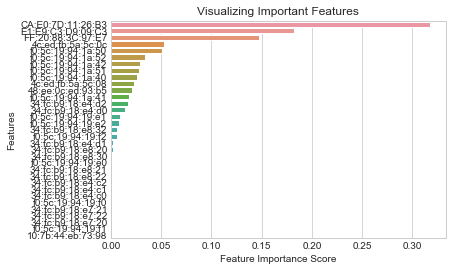

In [34]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestRegressor()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y)
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Model Training and Evaluation - KNN Regression Model

In [35]:
def compute_KNN_with_Regressor(flag=0,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = None,cross_validation = None,n_neighbors=5,
                                weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1):
    # Init the KNN Regressor Estimator
    knn_regression_estimator = KNeighborsRegressor(n_neighbors,weights,algorithm,leaf_size,p,metric,metric_params,n_jobs)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,knn_regression_estimator)
    else:
        main_estimator = knn_regression_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        if flag == 2:
            predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        else:
            predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_groups)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    return structure_data(result,coefficient_determination)

#### Check Training model with no cross validation
Use KNN Regressor to check the results on the training data alone

In [36]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_KNN_with_Regressor(flag=1,trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.230479,0.294507,0.542685,0.491638,0.0,0.000000,0.000000,1.314184,0.0,3.538361,0.926373,Both
0,0.321442,0.510720,0.714647,0.638701,0.0,0.000000,0.200000,1.697056,0.0,3.841875,0.872320,WiFi
1,0.606270,0.706773,0.840698,0.582806,0.0,0.447214,0.824621,1.788854,0.0,2.973214,0.823307,BLE


#### Experiment - KNN with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

In [37]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        skf = StratifiedKFold(n_splits=cv)
        splited = skf.split(trainX_data,default_groups)
        result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds,type
25,0.325601,0.505227,0.710793,0.632253,0.000000,0.000000,0.200000,1.697056,0.0,4.386342,0.873693,9,Both
24,0.331015,0.510187,0.714274,0.633364,0.000000,0.000000,0.282843,1.801077,0.0,4.386342,0.872453,8,Both
26,0.333444,0.557600,0.746726,0.668589,0.000000,0.000000,0.200000,1.758079,0.0,4.252058,0.860600,10,Both
23,0.338964,0.546667,0.739369,0.657530,0.000000,0.000000,0.400000,1.801077,0.0,4.386342,0.863333,7,Both
22,0.342412,0.551520,0.742644,0.659434,0.000000,0.000000,0.400000,1.788854,0.0,4.252058,0.862120,6,Both
21,0.348967,0.556533,0.746012,0.659800,0.000000,0.000000,0.400000,1.788854,0.0,4.252058,0.860867,5,Both
20,0.366333,0.599947,0.774562,0.682912,0.000000,0.000000,0.400000,1.709931,0.0,4.386342,0.850013,4,Both
19,0.396780,0.677493,0.823100,0.721632,0.000000,0.000000,0.400000,2.000000,0.0,4.326662,0.830627,3,Both
18,0.450867,0.735093,0.857376,0.729741,0.000000,0.000000,0.600000,2.000000,0.0,4.123106,0.816227,2,Both
7,0.460458,0.883893,0.940156,0.820225,0.000000,0.000000,0.482755,2.272427,0.0,4.534314,0.779027,9,WiFi


Number of Folds:  9


#### Experiment - KNN with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

In [38]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = size, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size,type
19,0.318295,0.505600,0.711056,0.637967,0.000000,0.000000,0.200000,1.808978,0.0,3.671512,0.873600,0.2,Both
21,0.355246,0.515467,0.717960,0.624955,0.000000,0.000000,0.400000,1.697643,0.0,4.118252,0.871133,0.4,Both
20,0.355722,0.540089,0.734907,0.644513,0.000000,0.000000,0.400000,1.772844,0.0,3.671512,0.864978,0.3,Both
18,0.364160,0.541333,0.735754,0.643618,0.000000,0.000000,0.400000,2.156845,0.0,2.280351,0.864667,0.1,Both
22,0.424187,0.639893,0.799933,0.679109,0.000000,0.000000,0.565685,1.856775,0.0,4.118252,0.840027,0.5,Both
23,0.456709,0.634756,0.796715,0.653545,0.000000,0.200000,0.575980,1.709931,0.0,3.328663,0.841311,0.6,Both
1,0.474352,0.799733,0.894278,0.760645,0.000000,0.000000,0.609737,2.073805,0.0,3.671512,0.800067,0.2,WiFi
0,0.505978,0.868800,0.932094,0.788078,0.000000,0.000000,0.721110,2.236068,0.0,3.224903,0.782800,0.1,WiFi
2,0.516071,0.935289,0.967103,0.819723,0.000000,0.000000,0.721110,2.221521,0.0,4.118252,0.766178,0.3,WiFi
3,0.524636,0.882667,0.939503,0.780676,0.000000,0.000000,0.721110,2.089960,0.0,4.118252,0.779333,0.4,WiFi


#### Experiment - KNN with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [39]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.453158,2.556800,1.599000,0.667627,1.000000,1.280625,1.697056,2.752301,0.0,3.794733,0.360800,BLE
2,1.991669,4.783467,2.187114,0.904330,1.280625,2.000000,2.340940,3.605551,0.2,4.386342,-0.195867,Both
0,2.372250,6.630880,2.575050,1.002323,1.649242,2.280351,2.973214,4.120922,0.2,4.686150,-0.657720,WiFi


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using KNN

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method,type
8,0.325601,0.505227,0.710793,0.632253,0.000000,0.000000,0.200000,1.697056,0.0,4.386342,0.873693,Stratified K-Fold,Both
7,0.355722,0.540089,0.734907,0.644513,0.000000,0.000000,0.400000,1.772844,0.0,3.671512,0.864978,HoldOut,Both
2,0.460458,0.883893,0.940156,0.820225,0.000000,0.000000,0.482755,2.272427,0.0,4.534314,0.779027,Stratified K-Fold,WiFi
1,0.516071,0.935289,0.967103,0.819723,0.000000,0.000000,0.721110,2.221521,0.0,4.118252,0.766178,HoldOut,WiFi
5,0.790664,1.128107,1.062124,0.709668,0.200000,0.632456,1.077033,2.200000,0.0,3.736308,0.717973,Stratified K-Fold,BLE
4,0.817611,1.216000,1.102724,0.741591,0.282843,0.632456,1.077033,2.328822,0.0,3.417601,0.696000,HoldOut,BLE
3,1.453158,2.556800,1.599000,0.667627,1.000000,1.280625,1.697056,2.752301,0.0,3.794733,0.360800,LOO,BLE
6,1.991669,4.783467,2.187114,0.904330,1.280625,2.000000,2.340940,3.605551,0.2,4.386342,-0.195867,LOO,Both
0,2.372250,6.630880,2.575050,1.002323,1.649242,2.280351,2.973214,4.120922,0.2,4.686150,-0.657720,LOO,WiFi


Selected cross validation method:  Stratified K-Fold


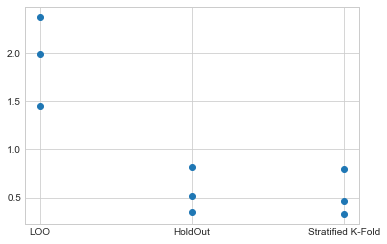

In [40]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    holdout = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    loo = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skf = StratifiedKFold(n_splits=selected_fold)
    splited = skf.split(trainX_data,default_groups)
    skfold = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'],'o')
selected_method = statistics.sort_values(by=['mae'])['method'].head(1).values[0]
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [41]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,preprocessing,preprocessingFunc,type
8,0.325601,0.505227,0.710793,0.632253,0.000000,0.000000,0.200000,1.697056,0.0,4.386342,0.873693,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
9,0.347275,0.546400,0.739189,0.652969,0.000000,0.000000,0.200000,1.788854,0.0,3.538361,0.863400,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
10,0.359683,0.531840,0.729274,0.634827,0.000000,0.000000,0.400000,1.720465,0.0,3.298485,0.867040,MaxAbsScaler,MaxAbsScaler(copy=True),Both
11,0.373058,0.550400,0.741889,0.641698,0.000000,0.000000,0.400000,1.843909,0.0,3.298485,0.862400,None,None,Both
0,0.460458,0.883893,0.940156,0.820225,0.000000,0.000000,0.482755,2.272427,0.0,4.534314,0.779027,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi
1,0.492151,0.918507,0.958388,0.822920,0.000000,0.000000,0.600000,2.262742,0.0,4.242641,0.770373,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi
2,0.566442,1.128320,1.062224,0.899189,0.000000,0.000000,0.632456,2.649261,0.0,4.720169,0.717920,MaxAbsScaler,MaxAbsScaler(copy=True),WiFi
3,0.576587,1.164747,1.079234,0.912910,0.000000,0.000000,0.721110,2.779767,0.0,4.720169,0.708813,None,None,WiFi
4,0.790664,1.128107,1.062124,0.709668,0.200000,0.632456,1.077033,2.200000,0.0,3.736308,0.717973,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
5,0.793722,1.131467,1.063704,0.708619,0.200000,0.632456,1.077033,2.236068,0.0,3.417601,0.717133,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE


Selected Preprocessing:  StandardScaler


#### Experiment - Running the KNN function with the different weights

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,weights,type
5,0.305612,0.466189,0.682780,0.610973,0.0,0.000000,0.197294,1.657554,0.0,4.384174,0.883453,distance,Both
4,0.325601,0.505227,0.710793,0.632253,0.0,0.000000,0.200000,1.697056,0.0,4.386342,0.873693,uniform,Both
1,0.434911,0.834224,0.913359,0.803703,0.0,0.000000,0.422782,2.248012,0.0,4.544098,0.791444,distance,WiFi
0,0.460458,0.883893,0.940156,0.820225,0.0,0.000000,0.482755,2.272427,0.0,4.534314,0.779027,uniform,WiFi
3,0.786352,1.247861,1.117077,0.793947,0.0,0.619437,1.037637,2.292594,0.0,3.707855,0.688035,distance,BLE
2,0.790664,1.128107,1.062124,0.709668,0.2,0.632456,1.077033,2.200000,0.0,3.736308,0.717973,uniform,BLE


Selected weight:  distance


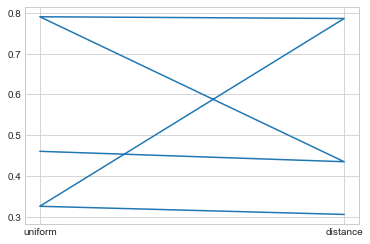

In [42]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','weights','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for weight in weights:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               weights=weight)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               weights=weight)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),weights=weight)
        result.append(weight)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['weights'],statistics['mae'])
selected_weight = statistics.sort_values(by=['mae'])['weights'].head(1).values[0]
print("Selected weight: ",selected_weight)

#### Experiment - Running the KNN function with the different algorithms

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,algorithm,type
9,0.325601,0.505227,0.710793,0.632253,0.0,0.000000,0.200000,1.697056,0.0,4.386342,0.873693,kd_tree,Both
11,0.325601,0.505227,0.710793,0.632253,0.0,0.000000,0.200000,1.697056,0.0,4.386342,0.873693,auto,Both
10,0.328520,0.522187,0.722625,0.644061,0.0,0.000000,0.200000,1.697056,0.0,4.386342,0.869453,ball_tree,Both
8,0.329149,0.527520,0.726306,0.647874,0.0,0.000000,0.200000,1.697056,0.0,4.472136,0.868120,brute,Both
1,0.460458,0.883893,0.940156,0.820225,0.0,0.000000,0.482755,2.272427,0.0,4.534314,0.779027,kd_tree,WiFi
3,0.460458,0.883893,0.940156,0.820225,0.0,0.000000,0.482755,2.272427,0.0,4.534314,0.779027,auto,WiFi
2,0.463377,0.900853,0.949133,0.828886,0.0,0.000000,0.482755,2.280351,0.0,4.534314,0.774787,ball_tree,WiFi
0,0.464006,0.906187,0.951938,0.831750,0.0,0.000000,0.482755,2.280351,0.0,4.534314,0.773453,brute,WiFi
5,0.790664,1.128107,1.062124,0.709668,0.2,0.632456,1.077033,2.200000,0.0,3.736308,0.717973,kd_tree,BLE
7,0.790664,1.128107,1.062124,0.709668,0.2,0.632456,1.077033,2.200000,0.0,3.736308,0.717973,auto,BLE


Selected algorithm:  kd_tree


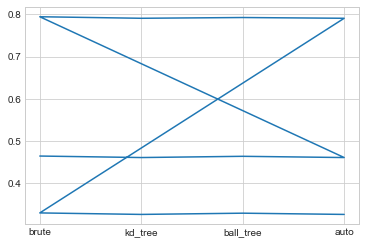

In [43]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','algorithm','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for algorithm in algorithms:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               algorithm=algorithm)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               algorithm=algorithm)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),algorithm=algorithm)
        result.append(algorithm)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['algorithm'],statistics['mae'])
selected_algorithm = statistics.sort_values(by=['mae'])['algorithm'].head(1).values[0]
print("Selected algorithm: ",selected_algorithm)

#### Experiment - Running the KNN function with the different distance metrics

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,distance,type
9,0.198623,0.291467,0.539877,0.502346,0.0,0.000000,0.000000,1.273554,0.0,4.024922,0.927133,manhattan,Both
11,0.204170,0.311467,0.558092,0.519751,0.0,0.000000,0.000000,1.314184,0.0,4.472136,0.922133,braycurtis,Both
10,0.234055,0.369067,0.607509,0.560986,0.0,0.000000,0.000000,1.606848,0.0,3.605551,0.907733,canberra,Both
3,0.307186,0.553813,0.744186,0.678280,0.0,0.000000,0.000000,1.949058,0.0,3.720215,0.861547,braycurtis,WiFi
1,0.307296,0.555840,0.745547,0.679724,0.0,0.000000,0.000000,1.990955,0.0,3.720215,0.861040,manhattan,WiFi
8,0.325601,0.505227,0.710793,0.632253,0.0,0.000000,0.200000,1.697056,0.0,4.386342,0.873693,euclidean,Both
2,0.338988,0.642400,0.801499,0.726768,0.0,0.000000,0.000000,2.163331,0.0,4.472136,0.839400,canberra,WiFi
0,0.460458,0.883893,0.940156,0.820225,0.0,0.000000,0.482755,2.272427,0.0,4.534314,0.779027,euclidean,WiFi
7,0.777387,1.099840,1.048733,0.704394,0.2,0.632456,1.019804,2.209072,0.0,3.417601,0.725040,braycurtis,BLE
4,0.790664,1.128107,1.062124,0.709668,0.2,0.632456,1.077033,2.200000,0.0,3.736308,0.717973,euclidean,BLE


Selected distance:  manhattan


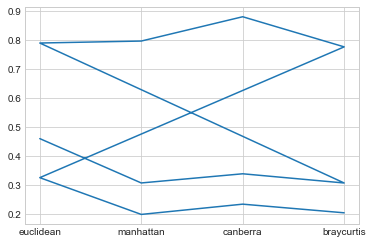

In [44]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','distance','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for distance in distance_metris:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               metric=distance)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               metric=distance)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),metric=distance)
        result.append(distance)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['distance'],statistics['mae'])
selected_distance = statistics.sort_values(by=['mae'])['distance'].head(1).values[0]
print("Selected distance: ",selected_distance)

#### Experiment - Tuning the K parameter

{'knn__n_neighbors': 3}
Max accuracy:  -1.2809040394381759
{'knn__n_neighbors': 7}
Max accuracy:  -0.8588241856314145
{'knn__n_neighbors': 3}
Max accuracy:  -1.0656461826140544


,n_neighbhors,type
0,3,WiFi
1,7,BLE
2,3,Both


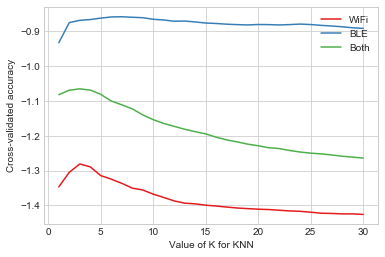

In [45]:
statistical_cols = ['n_neighbhors','type']
types = ['WiFi','BLE','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = list()
    knn_regressor_estimator = KNeighborsRegressor() #init knn regressor estimator
    param_grid = {'knn__n_neighbors': k_range}
    # Create a pipeline
    pipe = Pipeline([('standardizer', StandardScaler()), ('knn', knn_regressor_estimator)])
    estimator = GridSearchCV(pipe, param_grid,cv=selected_fold,scoring=sklearn.metrics.make_scorer(sklearn.metrics.mean_absolute_error,
                                                        greater_is_better=False,
                                                        multioutput="uniform_average"))
    #fit model to data
    estimator.fit(trainX_data,train_Y)
    print(estimator.best_params_)
    grid_mean_scores = estimator.cv_results_['mean_test_score']
    print('Max accuracy: ', max(grid_mean_scores))
    grid_result = [grid_mean_scores]
    result.append(estimator.best_params_['knn__n_neighbors'])
    result.append(feature)
    results.append(result)
    grid_results.append(grid_result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
for grid in grid_results:
    plt.plot(k_range, grid[0],color=palette(num),label=types[num])
    num+=1
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.legend(loc='upper right')
plt.show()

#### Run RandomizedSearchCV for parameter tunning¶

In [46]:
types = ['WiFi','BLE','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
tuned_parameters = {
    'knn__n_neighbors': k_range,
    'knn__metric':distance_metris,
    'knn__weights':weights,
    'knn__algorithm':['auto']
}
scores = ['r2']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train  
        pipe = Pipeline([('standardizer', StandardScaler()), ('knn', KNeighborsRegressor())])
        clf = RandomizedSearchCV(pipe, tuned_parameters,n_iter=150,cv=StratifiedKFold(n_splits=selected_fold, shuffle=True, random_state=42).split(trainX_data, default_groups),scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y)
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for r2

Fitting 9 folds for each of 150 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 9 folds for each of 150 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 9 folds for each of 150 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:   17.4s finished


,knn__weights,knn__n_neighbors,knn__metric,knn__algorithm,score,best_score,type
2,distance,6,manhattan,auto,r2,0.938901,Both
0,distance,5,manhattan,auto,r2,0.876944,WiFi
1,uniform,4,braycurtis,auto,r2,0.732344,BLE


### Best Parameters
Display the best parameters tunned throughout the experiments

In [47]:
conclusion_cols=['K Parameter','Cross Validation','Weight','Preprocessing','Algorithm','Distance']
conclusion_list = [4,selected_method,selected_weight,selected_preprocessing,selected_algorithm,selected_distance]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,K Parameter,Cross Validation,Weight,Preprocessing,Algorithm,Distance
0,4,Stratified K-Fold,distance,StandardScaler,kd_tree,manhattan


### Best Results

In [48]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
final_results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
        result = compute_KNN_with_Regressor(flag=1,n_neighbors=4,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                            metric=selected_distance,
                             weights=selected_weight)
    elif selected_method =='Stratified K-Fold':
        skf = StratifiedKFold(n_splits=selected_fold)
        splited = skf.split(trainX_data,default_groups)
        result = compute_KNN_with_Regressor(flag=1,n_neighbors=4,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),
                                             cross_validation = splited,
                            metric=selected_distance,
                             weights=selected_weight)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_KNN_with_Regressor(flag=1,n_neighbors=4,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),metric=selected_distance,
                             weights=selected_weight)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.176509,0.278962,0.528168,0.498133,0.0,0.000000,0.000000e+00,1.107818,0.0,4.369089,0.930260,Both
0,0.276489,0.531484,0.729029,0.675015,0.0,0.000000,4.440892e-16,1.863567,0.0,4.193584,0.867129,WiFi
1,0.777919,1.255401,1.120447,0.806914,0.0,0.605967,1.034121e+00,2.356323,0.0,3.676955,0.686150,BLE


### Best Result - Testing (Home | BLE)

In [49]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = KNeighborsRegressor(n_neighbors=4,metric=selected_distance,algorithm=selected_algorithm,
                             weights=selected_weight)
    else: 
        model = KNeighborsRegressor()
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,2.427673,6.990384,2.643933,1.051327,1.443464,2.538384,3.400817,3.861579,0.558794,4.493233,-3.746100,None,True
1,3.599732,13.673077,3.697712,0.848853,2.906888,3.605551,4.254409,5.044799,2.247221,5.044799,-8.660401,None,False


### Best Result - Testing (Home | BLE)

In [50]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_home_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = KNeighborsRegressor(n_neighbors=4,metric=selected_distance,algorithm=selected_algorithm,
                             weights=selected_weight)
    else: 
        model = KNeighborsRegressor()
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_home_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_home_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,2.077592,5.318463,2.306179,1.004909,1.267108,2.078870,2.537026,3.833766,0.478013,4.516904,-2.932771,None,True
1,3.615587,13.802000,3.715104,0.857430,2.906888,3.605551,4.230456,5.044799,2.247221,5.080354,-8.692116,None,False


### Results Display

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,0.176509,0.278962,0.528168,0.498133,0.000000,0.000000,0.000000,1.107818,0.000000,4.369089,0.930260,Both,None
2,2.077592,5.318463,2.306179,1.004909,1.267108,2.078870,2.537026,3.833766,0.478013,4.516904,-2.932771,None,True
1,2.427673,6.990384,2.643933,1.051327,1.443464,2.538384,3.400817,3.861579,0.558794,4.493233,-3.746100,None,True


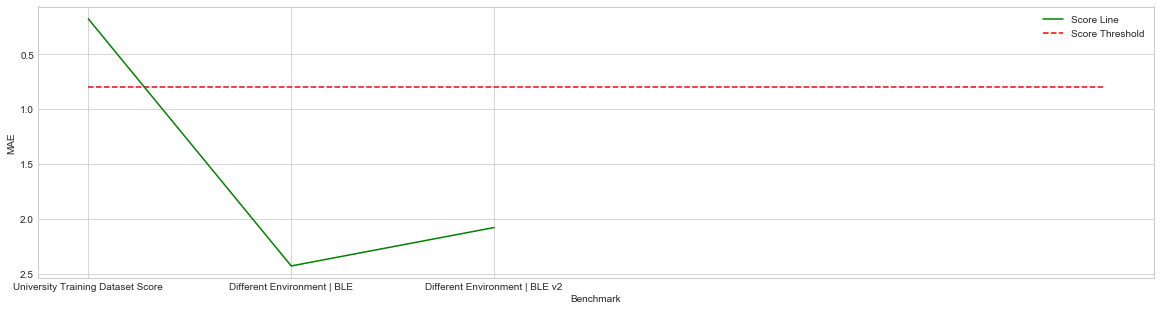

In [51]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
types = ['University Training Dataset Score','Different Environment | BLE','Different Environment | BLE v2']
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['mae']))
plt.figure(figsize=(20,5))
plt.plot(types,results['mae'],color='green',label='Score Line')
plt.hlines(0.8,0,5,color='red',label='Score Threshold',linestyles='dashed')
plt.xlabel('Benchmark')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()